<a href="https://colab.research.google.com/github/diazid/bigdata_metamovilidad/blob/main/metamovilidad_analysisbigdata2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS DE BIG DATA DE DATOS MOVILES
### Navegacion Web vs Movilidad.

Israel Diaz - idiazg@udd.cl

## Introducción

Los teléfonos móviles han evolucionado de una forma tal que hoy en día se han convertido en computadores capaces de instalar aplicaciones desde un repositorio, con disponibilidad de almacenamiento y cómputo on-the-edge. Nuestro teléfono celular también es nuestra forma de socializar, tenemos una infinidad de aplicativos para todos los gustos, tales como, Facebook, Instagram, Twitter, Tik Tok, y un largo etc. También, la forma de comunicarnos ha cambiado desde entonces, tenemos Whatsapp, Telegram, Hangouts, Skype y otro sinfín de aplicativos para text messaging y video calling.

Han habido múltiples intentos de georeferenciar dominios de internet (Moss and Townsend 1997). La mayoría de las personas no solo pasan su día en un lugar, sino también se mueve a lo largo de la ciudad (Montgomery / 2003), Graells-Caro (2018) exponen en su estudio el uso de dispositivos móviles para inferir determinar formas de movilidad, por lo tanto, es posible también determinar una correlación espacial del uso del internet móvil. Dependiendo de donde se encuentran, o cómo se desplazan, existe una idea empírica sobre cómo el usuario da uso a su teléfono móvil (navegación web o uso de apps).

El propósito de este estudio es definir esta correlación entre la movilidad física y el uso de internet a través del teléfono móvil. Para ellos se trabajará en base a la hipótesis de que existe una correlación entre la forma de desplazarnos y la utilización del móvil. Este trabajo se ha delimitado geográficamente a la ciudad de Santiago de Chile

### Carga del ambiente de Spark

In [ ]:
import os
os.environ['SPARK_HOME'] = "/home/idiazg/spark-2.4.6-bin-hadoop2.7/"

In [ ]:
import findspark 
findspark.init()

### CONFIGURACION DE SESIÓN PYSPARK

In [ ]:
#Initializing SparkSession

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Metamobilidad").config('spark.executor.memory','64g').config('spark.driver.memory','64g').master("local[*]").getOrCreate()

In [ ]:
spark

In [ ]:
from pyspark.sql import functions as F

### Iniciando otras librerias

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
requests.packages.urllib3.disable_warnings()

### Cargando data y creando el spark.dataframe

Se ha levantado una instancia Dataproc in Google Cloud Platform, la esta conformado por 1 master y 2 workers, ademas, la data se encuentra en blob storage de Google Cloud Storage.

Se ha cargado los datos en una dataframe "data" utilizando el spark.read.format("csv").

In [ ]:
#getting data from storage and loading dataframe

bucket = "data/weblog_anonimizado/rep/"
data = spark.read.format('csv').option("header", "true").option("delimiter", ",").load(bucket+"*.csv")

### Exploracion de data

Se desea conocer el contenido de los datos, para ello se realizara al exploración estadística de los datos, de igual forma se preparan los datos para ser utilizado posteriormente en el análisis. 

In [ ]:
data.printSchema() #devuelve la estructura de los datos

root
 |-- Unnamed: 0: string (nullable = true)
 |-- OPERATOR_ID: string (nullable = true)
 |-- EVENT_TM: string (nullable = true)
 |-- USER_ID: string (nullable = true)
 |-- PROTOCOL_CD: string (nullable = true)
 |-- DOMAIN_NAME: string (nullable = true)
 |-- FULL_URI_DES: string (nullable = true)
 |-- REFERER_NAME: string (nullable = true)
 |-- USER_AGENT_DES: string (nullable = true)
 |-- CONT_TYPE_CD: string (nullable = true)
 |-- STATUS_CODE_CD: string (nullable = true)
 |-- METHOD_CD: string (nullable = true)
 |-- CLIENT_IP_DES: string (nullable = true)
 |-- CLIENT_PORT_DES: string (nullable = true)
 |-- SERVER_IP_DES: string (nullable = true)
 |-- SERVER_PORT_CD: string (nullable = true)
 |-- VOLUME_UP_QT: string (nullable = true)
 |-- VOLUME_DOWN_QT: string (nullable = true)
 |-- REQUEST_DURATION_QT: string (nullable = true)
 |-- SESSION_ID: string (nullable = true)
 |-- EVENT_SEQUENCE_NUM: string (nullable = true)
 |-- DIRECTION_CD: string (nullable = true)
 |-- UDF:hashData(IM

In [ ]:
# Devuelve la cantidad de registros
print("The lenght of the data is: ", data.count())

The lenght of the data is:  20055553


#### Los Usuarios

La columna usuarios contiene un id unico en forma de hash el cual permite individualizar al registro generado. 

* Contar numero de usuarios unicos
* Contar la cantidad de interacciones de los usuarios
* presentaro los datos en un gráfico


In [ ]:
# Devuelve la cantidad de usuarios únicos
data.select(F.countDistinct("USER_ID")).show()

+-----------------------+
|count(DISTINCT USER_ID)|
+-----------------------+
|                 524778|
+-----------------------+



Devuelve la cantidad de veces que aparece cada usuario en el dataset

In [ ]:
count_users = data.groupBy("USER_ID").count().sort(F.desc("count"))
count_users.show(5)

+--------------------+-----+
|             USER_ID|count|
+--------------------+-----+
|58cbf72175a0bc80a...|10965|
|a497e9b123ff28af0...| 7699|
|442bbb3235b0e58a2...| 5252|
|89ca4f5d11a7cfc2b...| 3859|
|a306279df498a6dd0...| 2982|
+--------------------+-----+
only showing top 5 rows



Presenta los datos anteriores en un gráfico de barras.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '58cbf72175a0bc80a34f457d58ea8391058dc2164d2a2e34c0a9708daecbd816'),
  Text(1, 0, 'a497e9b123ff28af083871fb1b309e81aa1194b6cb71e880f83f1640dfcc38c1'),
  Text(2, 0, '442bbb3235b0e58a2a8fe93b1121d11f51b644a7641dec86dfa8231d0328bf7e'),
  Text(3, 0, '89ca4f5d11a7cfc2b44159017c3e83c56e862a2089d6880a512642763fdcc78c'),
  Text(4, 0, 'a306279df498a6dd0a201ddfcd1ee11c36ff25347b076f06c55e48d912c8d637'),
  Text(5, 0, '4715fe6012d08b07fbd91fe62ea13c7b76d967bb4aa6a077b9154c7537e4d0b6'),
  Text(6, 0, '40b2fe4ef65b402bae58b065b1d200ef842bd95fa9aa90e3487a60e88c1ab3bb'),
  Text(7, 0, '524ed23be29cf7fa0e4a4e5145d0ec4e4bdcc5bc3bd1f528b98dcc590cad7892'),
  Text(8, 0, '9ff1407e85ecf5a28145324872bceec9335ef8b1e25b7a9866c92b6b3de92adb'),
  Text(9, 0, '1ebf43a7a7d9df32f201c5fc79d6dc1be111f580249c8bf25704e25613d6609e'),
  Text(10, 0, '55b83d929f693a7ebbb434559e6

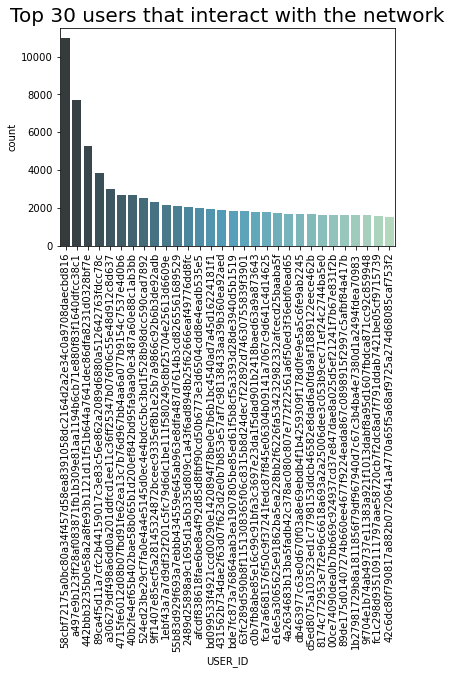

In [ ]:
#Crea una variable llamada c_user_pandas con el resultado de count_users en formato de dataframe pandas.
c_user_pandas = count_users.limit(30).toPandas()
plt.title("Top 30 users that interact with the network", size=20)
sns.barplot(x="USER_ID", y="count", data=c_user_pandas, 
            palette="GnBu_d")
plt.xticks(rotation=90)

#### Las Applicaciones

Las aplicaciones se encuentra en la variable `APPLICATION_NAME` la continen strings con los nombres de las apps en cada registro. Dicho string viene de la forma `Facebook_HTTP_Video`, `Facebook_Web` por ejemplo. Dada esta estructura del string, se deberá realizar un split y conservar solo el plimer componente del split. Esto se guardará en una nueva variable llamada `APP_SHORT_NAME`.

Los objetivos de esta seccion son:

* Contar consultas por aplicaciones
* Presenta la presentación en un gráfico. 

In [ ]:
split_col = pyspark.sql.functions.split(data['APPLICATION_NAME'], '_')
data = data.withColumn('APP_SHORT_NAME', split_col.getItem(0))
count_apps = data.where(F.col("APP_SHORT_NAME").isNotNull()).groupBy("APP_SHORT_NAME").count().sort(F.desc("count"))

Seguidamente se creara el grafico de barras para visualizar las cantidades de consultas a las 30 apps mas usadas.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Instagram'),
  Text(1, 0, 'Facebook'),
  Text(2, 0, 'Spotify'),
  Text(3, 0, 'YouTube'),
  Text(4, 0, 'Google'),
  Text(5, 0, 'GoogleSearch'),
  Text(6, 0, 'Netflix'),
  Text(7, 0, 'Xnxx'),
  Text(8, 0, 'Hangouts'),
  Text(9, 0, 'ITunes'),
  Text(10, 0, 'AppleiCloud'),
  Text(11, 0, 'WazeGPS'),
  Text(12, 0, 'DoubleClick'),
  Text(13, 0, 'AppleMap'),
  Text(14, 0, '91avying'),
  Text(15, 0, 'ClashRoyale'),
  Text(16, 0, 'Apple'),
  Text(17, 0, 'Battlefield1942'),
  Text(18, 0, 'GoogleAdsense'),
  Text(19, 0, 'Microsoft'),
  Text(20, 0, 'IOS'),
  Text(21, 0, 'AmazonS3'),
  Text(22, 0, 'Cdn'),
  Text(23, 0, 'Pinterest'),
  Text(24, 0, 'TaoBao'),
  Text(25, 0, 'Bing'),
  Text(26, 0, 'Epicgames'),
  Text(27, 0, 'Applovin'),
  Text(28, 0, 'Yahoo'),
  Text(29, 0, 'Crysis')])

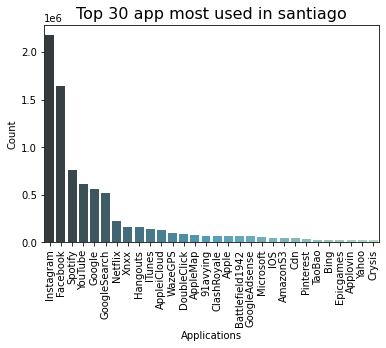

In [ ]:
#Crea una variable llamada c_count_apps con el resultado de count_users en formato de dataframe pandas.
c_count_apps = count_apps.limit(30).toPandas()
plt.title("Top 30 app most used in santiago", size=16)
sns.barplot(x="APP_SHORT_NAME", y="count", data=c_count_apps, 
            palette="GnBu_d")
plt.xlabel("Applications")
plt.ylabel("Count")
plt.xticks(rotation=90)

#### Subset de datos y aplicando datatypes. 

Se seleccionan las unas pocas features para ver de forma grafica como se componen los datos antes de realizar el estudio, ya que el estudio esta acotado solo al Gran Santiago.

In [ ]:
#subset de datos en la variable subset
subset = data.select("EVENT_TM", "USER_ID", "APP_SHORT_NAME", "CELL_ID")
subset.show(5)

+---------------+--------------------+--------------+-----------+
|       EVENT_TM|             USER_ID|APP_SHORT_NAME|    CELL_ID|
+---------------+--------------------+--------------+-----------+
|20200217T150104|cc568c51114a81d15...|       99Taxis|  1264929.0|
|20200217T150255|b501b81f5d4ffa587...|          null|  1027622.0|
|20200217T150104|82bfd89bb3a192aed...|     Instagram|159768096.0|
|20200217T150255|9c22b3abe967f44e8...|      Facebook|    49737.0|
|20200217T150104|a24a9a4539ca7c061...|          null|159884831.0|
+---------------+--------------------+--------------+-----------+
only showing top 5 rows



Como se ve la columna `CELL_ID` no son enteros. Se convierten en enteros para poder hacer luego el join con la data de antenas.

In [ ]:
from pyspark.sql.types import IntegerType
subset = subset.withColumn("CELL_ID", subset["CELL_ID"].cast(IntegerType()))

Se cambia la columna `EVENT_TM` a datos de fechas, para ellos se invoca el metodo unix_timestamp de las funciones de spark.

In [ ]:
#Setting datatype as timestamp from string to EVENT_TM
subset = subset.withColumn('EVENT_TM', F.from_unixtime(F.unix_timestamp(F.col(('EVENT_TM')), "yyyyMMdd'T'HHmmss"), "yyyy-MM-dd'T'HH:mm:ss"))
subset.show(5)

+-------------------+--------------------+--------------+---------+
|           EVENT_TM|             USER_ID|APP_SHORT_NAME|  CELL_ID|
+-------------------+--------------------+--------------+---------+
|2020-02-17T15:01:04|cc568c51114a81d15...|       99Taxis|  1264929|
|2020-02-17T15:02:55|b501b81f5d4ffa587...|          null|  1027622|
|2020-02-17T15:01:04|82bfd89bb3a192aed...|     Instagram|159768096|
|2020-02-17T15:02:55|9c22b3abe967f44e8...|      Facebook|    49737|
|2020-02-17T15:01:04|a24a9a4539ca7c061...|          null|159884831|
+-------------------+--------------------+--------------+---------+
only showing top 5 rows



Dado de que existen elementos Null en las columnas de interés, y no existe forma de llenar esos datos, se procederá a eliminar todos los registros donde existan elementos null en las columnas `APP_SHORT_NAME`, `CELL_ID` y `USER_ID`. 

In [ ]:
#Dropping 'null' values in APP_SHORT_NAME
subset = subset.where(F.col("APP_SHORT_NAME").isNotNull())
subset = subset.where(F.col("CELL_ID").isNotNull())
subset = subset.where(F.col("USER_ID").isNotNull())
subset.show(5)

+-------------------+--------------------+--------------+---------+
|           EVENT_TM|             USER_ID|APP_SHORT_NAME|  CELL_ID|
+-------------------+--------------------+--------------+---------+
|2020-02-17T15:01:04|cc568c51114a81d15...|       99Taxis|  1264929|
|2020-02-17T15:01:04|82bfd89bb3a192aed...|     Instagram|159768096|
|2020-02-17T15:02:55|9c22b3abe967f44e8...|      Facebook|    49737|
|2020-02-17T15:02:55|e99ecc19fb171ea23...| GoogleAdsense|  1052193|
|2020-02-17T15:01:04|f268eb000e1717c53...|     Instagram|  1324321|
+-------------------+--------------------+--------------+---------+
only showing top 5 rows



La cantidad de registros resultantes despues de depurar los Null values es

In [ ]:
print("The lenght of the subset is: ", subset.count())

The lenght of the subset is:  9158075


#### Cargando catalogo de antenas

El archivo cell_catalogue contiene el registro de antenas de la compañia telefónica, de estos datos se utilizaran la latitud y longitud de forma de tener la referencia geografica de los puntos de datos. 

In [ ]:
#carga de datos desde el bucket
cell_id_lf = "data/" #cell_id location file
cell_id = spark.read.format('csv').option("header", "true").option("delimiter", ",").load(cell_id_lf+"cell_catalogue_20200428.csv")

In [ ]:
cell_id.show(5)

+-------+-------------+------+------------------+-----------+--------------+--------------+-----------------+---------------+
|cell_id|sm_cellid_hex|bts_id|technology_cell_cd|geo_area_id|antenna_lat_co|antenna_lon_co|antenna_height_qt|beam_azimuth_qt|
+-------+-------------+------+------------------+-----------+--------------+--------------+-----------------+---------------+
|  10001|         2711| 4TERF|                3G|      10101|       -41.453|     -72.93501|               34|            250|
|  10002|         2712| 4TERF|                3G|      10101|       -41.453|     -72.93501|               34|            345|
|  10003|         2713| 4TERF|                3G|      10101|       -41.453|     -72.93501|               34|            150|
|  10004|         2714| 7COMF|                3G|      14101|     -39.83148|     -73.24257|               42|             10|
|  10005|         2715| 7COMF|                3G|      14101|     -39.83148|     -73.24257|               42|         

Se realiza un subset de datos y renombra la columna `cell_id` a `CELL_ID` para hacer mas facilmente el join entre las tablas.

In [ ]:
cell_id = cell_id.select(['cell_id', 'antenna_lat_co', 'antenna_lon_co','technology_cell_cd'])
cell_id = cell_id.withColumnRenamed('cell_id', 'CELL_ID')
cell_id.show(5)

+-------+--------------+--------------+------------------+
|CELL_ID|antenna_lat_co|antenna_lon_co|technology_cell_cd|
+-------+--------------+--------------+------------------+
|  10001|       -41.453|     -72.93501|                3G|
|  10002|       -41.453|     -72.93501|                3G|
|  10003|       -41.453|     -72.93501|                3G|
|  10004|     -39.83148|     -73.24257|                3G|
|  10005|     -39.83148|     -73.24257|                3G|
+-------+--------------+--------------+------------------+
only showing top 5 rows



#### Realizando un Join entre dataframes

In [ ]:
fulldata = subset.join(cell_id, on = 'CELL_ID', how='left')
fulldata.show(5)

+---------+-------------------+--------------------+--------------+--------------+--------------+------------------+
|  CELL_ID|           EVENT_TM|             USER_ID|APP_SHORT_NAME|antenna_lat_co|antenna_lon_co|technology_cell_cd|
+---------+-------------------+--------------------+--------------+--------------+--------------+------------------+
|  1264929|2020-02-17T15:01:04|cc568c51114a81d15...|       99Taxis|     -33.02642|     -71.54503|                4G|
|159768096|2020-02-17T15:01:04|82bfd89bb3a192aed...|     Instagram|      -29.9125|     -71.25778|                4G|
|    49737|2020-02-17T15:02:55|9c22b3abe967f44e8...|      Facebook|     -33.40342|     -70.57529|                3G|
|  1052193|2020-02-17T15:02:55|e99ecc19fb171ea23...| GoogleAdsense|     -32.82465|     -70.57799|                4G|
|  1324321|2020-02-17T15:01:04|f268eb000e1717c53...|     Instagram|     -33.05511|     -71.48798|                4G|
+---------+-------------------+--------------------+------------

In [ ]:
print("The lenght of the fulldata is: ", fulldata.count())

The lenght of the fulldata is:  9449573


La estructura de datos resultante es la siguiente

In [ ]:
fulldata.printSchema()

root
 |-- CELL_ID: integer (nullable = true)
 |-- EVENT_TM: string (nullable = true)
 |-- USER_ID: string (nullable = true)
 |-- APP_SHORT_NAME: string (nullable = true)
 |-- antenna_lat_co: string (nullable = true)
 |-- antenna_lon_co: string (nullable = true)
 |-- technology_cell_cd: string (nullable = true)



In [ ]:
fulldata.head()

Row(CELL_ID=1264929, EVENT_TM='2020-02-17T15:01:04', USER_ID='cc568c51114a81d1509e2073521a0a4e2b1c028206e43bce4572771ffa058ff8', APP_SHORT_NAME='99Taxis', antenna_lat_co='-33.02642', antenna_lon_co='-71.54503', technology_cell_cd='4G')

Despues de realizar el Join han aparecido varios elementos `NULL`, los registros que contienen los mismos se eliminan para tener el dataframe depurado. 

In [ ]:
node_apps = fulldata.groupBy("APP_SHORT_NAME", "CELL_ID", "antenna_lat_co", "antenna_lon_co").count().sort(F.desc("count"))
node_apps = node_apps.where(node_apps.APP_SHORT_NAME != 'NULL')
#node_apps = node_apps.where(node_apps.CELL_ID != 'NULL')
node_apps = node_apps.where(node_apps.antenna_lon_co != 'NULL')
node_apps = node_apps.where(node_apps.antenna_lat_co != 'NULL')
node_apps.show(5)

+--------------+---------+--------------+--------------+-----+
|APP_SHORT_NAME|  CELL_ID|antenna_lat_co|antenna_lon_co|count|
+--------------+---------+--------------+--------------+-----+
|     Instagram|134240287|     -35.82003|     -72.58626| 2952|
|          Xnxx|  1076773|     -33.64878|      -70.6675| 2900|
|       Netflix|134255903|     -36.79529|     -72.95868| 1910|
|    TeamViewer|  1367841|     -33.44614|     -70.65354| 1625|
|     Instagram|134294303|      -30.0865|      -71.3709| 1590|
+--------------+---------+--------------+--------------+-----+
only showing top 5 rows



#### Exploracion de data geográfica

Se desea georeferenciar los datos registros, ya que no se quieren datos con esten contenidos en las comunas del Gran Santiago. Para ellos se utilizará la libraria Geopandas.

In [ ]:
import geopandas as gpd
import shapely

Se guardan los datos como un dataframe de pandas ya que con pyspar no es posible utilizar la librería de Geopandas. 

In [ ]:
node_apps_map = node_apps.toPandas()

In [ ]:
node_apps_map.CELL_ID = node_apps_map.CELL_ID.astype('int')
node_apps_map.antenna_lon_co = node_apps_map.antenna_lon_co.astype('float')
node_apps_map.antenna_lat_co = node_apps_map.antenna_lat_co.astype('float')

Se crea el geopandas dataframe, y se asigna le referencia geográfica a `epsg:4674`

In [ ]:
node_apps_map = gpd.GeoDataFrame(node_apps_map, geometry=node_apps_map[['antenna_lon_co', 'antenna_lat_co']].apply(lambda x: shapely.geometry.Point(*x), axis=1),
                          crs={'init': 'epsg:4674'})

/home/idiazg/anaconda3/envs/pyspark/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


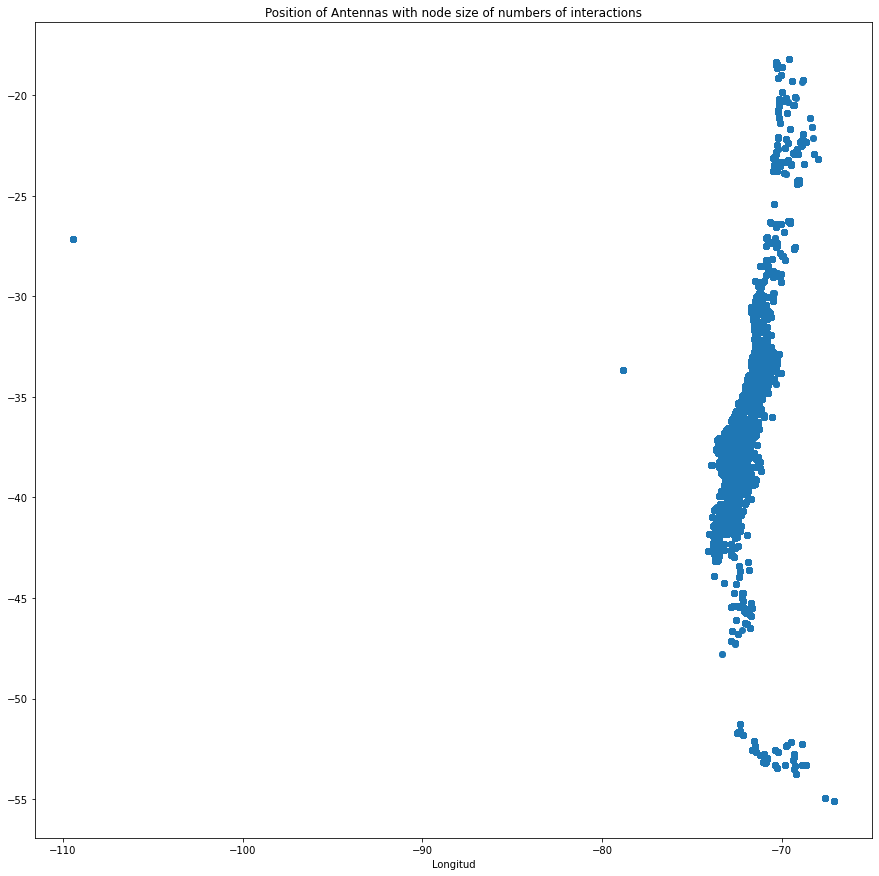

In [ ]:
plt.figure(figsize=(15,15))
plt.title("Position of Antennas with node size of numbers of interactions")
plt.scatter(x=node_apps_map.antenna_lon_co, y=node_apps_map.antenna_lat_co)
plt.xlabel("Latitud")
plt.xlabel("Longitud")
plt.show()

Luego de plotear los datos se puede ver, aunque no esta el mapa superpuesto, que los mismos corresponden a todo Chile. Esto no es desable ya que sale del alcance del proyecto de grado, toda vez que es solo para Gran Santiago. Por lo cual, se debe extraer los datos cuya latitud y longitud se encuentre dentro del gran santiago. Geopandas puede servir para realizar esta tarea.

#### Subsetting data for Greater Santiago Area.

In [ ]:
import contextily as ctx

Se seleccionan las comunas que forman parte del estudo, y se guardan en la variable comuna

In [ ]:
comunas = ['CERRILLOS', 'CERRO NAVIA', 'CONCHALÍ', 'EL BOSQUE', 'ESTACIÓN CENTRAL', 'HUECHURABA', 'INDEPENDENCIA', 'LA CISTERNA', 'LA FLORIDA', 
           'LA GRANJA', 'LA PINTANA', 'LA REINA', 'LAS CONDES', 'LO BARNECHEA', 'LO ESPEJO', 'LO PRADO', 'MACUL', 'MAIPÚ', 'ÑUÑOA', 'PADRE HURTADO', 
           'PEDRO AGUIRRE CERDA', 'PEÑALOLÉN', 'PROVIDENCIA', 'PUDAHUEL', 'PUENTE ALTO', 'QUILICURA', 'QUINTA NORMAL', 'RECOLETA', 
           'RENCA', 'SAN BERNARDO', 'SAN JOAQUÍN', 'SAN MIGUEL', 'SAN RAMÓN', 'SANTIAGO', 'VITACURA']

Se cargan los mapas de la region metropolitana

<AxesSubplot:>

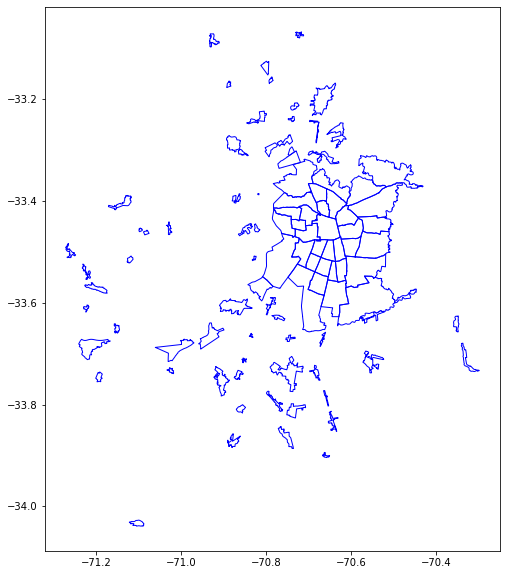

In [ ]:
mapa_zonas = gpd.read_file('data/mapas/R13/LIMITE_URBANO_CENSAL_C17.shp', encoding='utf-8', crs={'init': 'epsg:4674'})
mapa_zonas.plot(figsize=(10,10),facecolor="none", edgecolor="blue")

Como se puede ver los mapas no estan en las condiciones ser utilizados, por lo cual se filtran por comunas y por la categoria `CIUDAD` de la variable `NOM_CATEG` 

<AxesSubplot:>

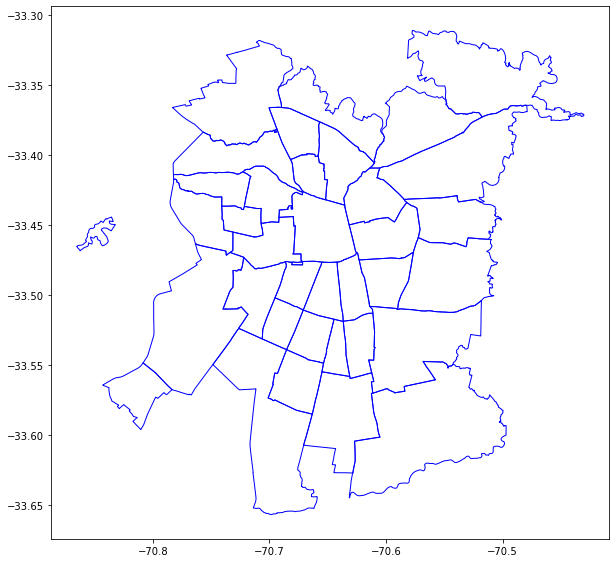

In [ ]:
gransantiago = mapa_zonas[(mapa_zonas.NOM_COMUNA.isin(comunas)) & (mapa_zonas.NOM_CATEG == 'CIUDAD')]
gransantiago.plot(figsize=(10,10),facecolor="none", edgecolor="blue")

El mapa se encuentra mas limpio, por lo cual se utilizara de esta forma.

Ahora se carga la ubicacion de las antenas y se plotean en un mapa, para ello se ha utilizado una libreria llamada `contextily` la cual se utiliza para añadile un fondo de mapa. 

In [ ]:
mapa_antena = gpd.GeoDataFrame(node_apps_map, 
                               geometry=gpd.points_from_xy(node_apps_map['antenna_lon_co'], 
                                                           node_apps_map['antenna_lat_co']), 
                               crs=mapa_zonas.crs)

/home/idiazg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  after removing the cwd from sys.path.


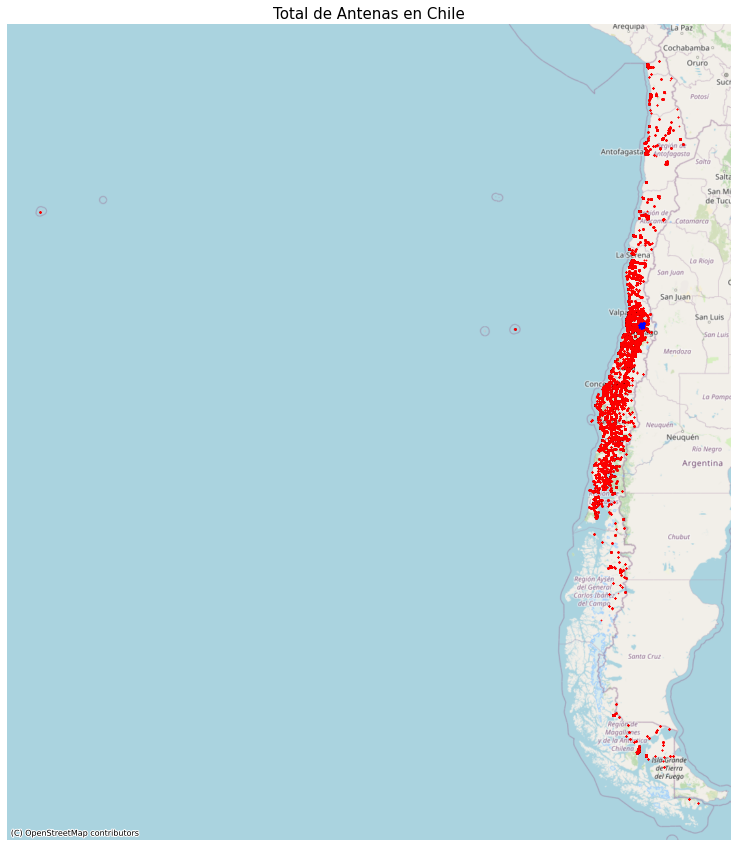

In [ ]:
ax = mapa_antena.to_crs(epsg=3857).plot(figsize=(15,15), markersize=1, marker='.', color = "red")
ax = gransantiago.to_crs(epsg=3857).plot(facecolor="none", edgecolor="blue", ax=ax)

ctx.add_basemap(ax, url=ctx.providers.OpenStreetMap.Mapnik) #great ah
plt.title('Total de Antenas en Chile', size=15)
ax.set_axis_off()

Se procede a realizar un subset del mapa para ello se utiliza el metodo `sjoin` de geopandas utilizando el argumento `op='within'`

In [ ]:
puntos_rm = gpd.sjoin(mapa_antena, gransantiago, op = 'within')

Se plotea el mapa del subset

/home/idiazg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  This is separate from the ipykernel package so we can avoid doing imports until


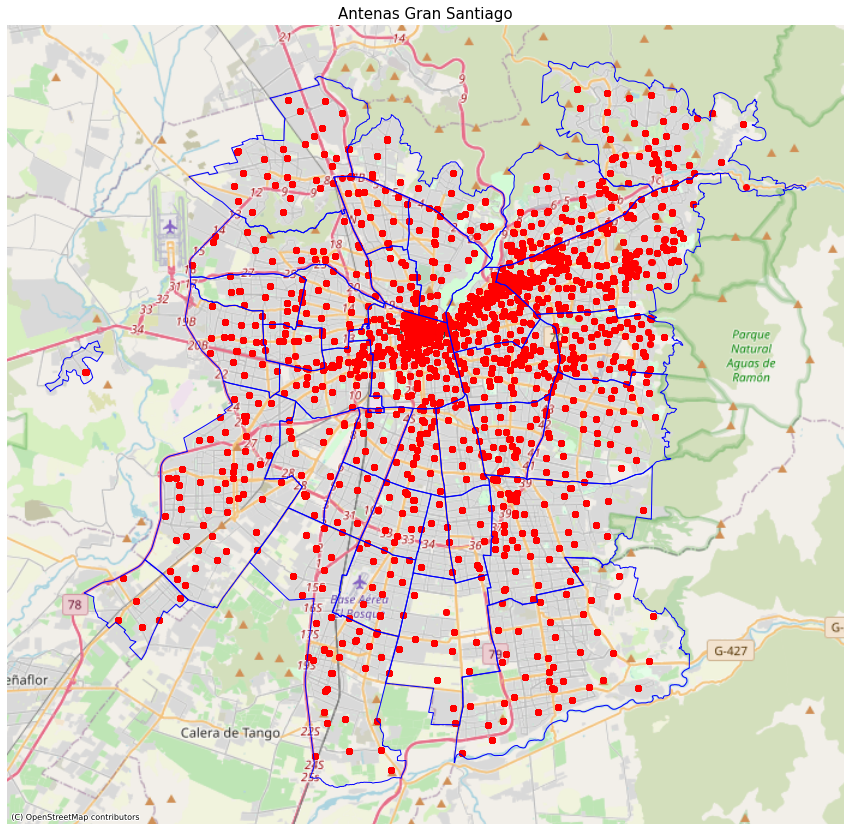

In [ ]:
ax = puntos_rm.to_crs(epsg=3857).plot(figsize=(15,15), color= "red")
ax = gransantiago.to_crs(epsg=3857).plot(facecolor="none", edgecolor="blue", ax=ax)
ctx.add_basemap(ax, url=ctx.providers.OpenStreetMap.Mapnik)
plt.title('Antenas Gran Santiago', size=15)
ax.set_axis_off()

Perfecto, el mapa esta listo para realizar el subset de la data original

In [ ]:
puntos_rm.head(1)

,APP_SHORT_NAME,CELL_ID,antenna_lat_co,antenna_lon_co,count,geometry,index_right,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area
1,Xnxx,1076773,-33.64878,-70.6675,2900,POINT (-70.66750 -33.64878),87,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13401,SAN BERNARDO,SAN BERNARDO,CAPITAL PROVINCIAL,CIUDAD,0.430963,0.005368


In [ ]:
antenas_rm = puntos_rm[['CELL_ID', 'antenna_lat_co', 'antenna_lon_co', 'NOM_COMUNA', 'NOM_PROVIN']]

In [ ]:
#en caso de que existan duplicados
antenas_rm.drop_duplicates(subset='CELL_ID',keep='first', ignore_index=True, inplace=True)

/home/idiazg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Teniendo el subset de antenas, se procede a hacer un join con el dataset original.

Se hace necesario convertir el Pandas Dataframe en un Spark Dataframe

In [ ]:
antenas_rm.head(1)

,CELL_ID,antenna_lat_co,antenna_lon_co,NOM_COMUNA,NOM_PROVIN
0,1076773,-33.64878,-70.6675,SAN BERNARDO,MAIPO


Se obtiene la cantidad de antenas por comuna

In [ ]:
#SERVIRA PARA NORMALIZAR LOS DATOS LUEGO
cant_antenna_comuna = antenas_rm.groupby(['NOM_COMUNA'])['CELL_ID'].count()

Dado que la idea es trabajar con pyspark, se transforma el pandas dataframe en un spark dataframe

In [ ]:
from pyspark.sql.types import *

In [ ]:
mySchema = StructType([ StructField("CELL_ID", IntegerType(), True),
                       StructField("antenna_lat_co", FloatType(), True),
                       StructField("antenna_lon_co", FloatType(), True),
                       StructField("NOM_COMUNA", StringType(), True), 
                       StructField("NOM_PROVIN", StringType(), True)])

In [ ]:
antenas_rm_pyspark = spark.createDataFrame(antenas_rm, schema=mySchema)

In [ ]:
type(antenas_rm_pyspark)

pyspark.sql.dataframe.DataFrame

In [ ]:
print('La cantidad de antenas en Gran Santiago es {}'.format(antenas_rm_pyspark.count()))

La cantidad de antenas en Gran Santiago es 12440


In [ ]:
antenas_rm_pyspark.printSchema()

root
 |-- CELL_ID: integer (nullable = true)
 |-- antenna_lat_co: float (nullable = true)
 |-- antenna_lon_co: float (nullable = true)
 |-- NOM_COMUNA: string (nullable = true)
 |-- NOM_PROVIN: string (nullable = true)



Ahora se procede a hacer el join entre el dataframe `subset` y `antenas_rm_pyspark`

In [ ]:
registros_grstgo = subset.join(antenas_rm_pyspark, on = 'CELL_ID', how='right')
registros_grstgo.show(5)

+-------+-------------------+--------------------+--------------+--------------+--------------+-----------+----------+
|CELL_ID|           EVENT_TM|             USER_ID|APP_SHORT_NAME|antenna_lat_co|antenna_lon_co| NOM_COMUNA|NOM_PROVIN|
+-------+-------------------+--------------------+--------------+--------------+--------------+-----------+----------+
|   1238|2020-02-17T15:01:16|d3c0e6101d975597e...|       Spotify|     -33.42109|     -70.75916|CERRO NAVIA|  SANTIAGO|
|   1238|2020-02-17T15:03:23|d3c0e6101d975597e...|       Spotify|     -33.42109|     -70.75916|CERRO NAVIA|  SANTIAGO|
|   1238|2020-02-17T15:01:50|d3c0e6101d975597e...|       Spotify|     -33.42109|     -70.75916|CERRO NAVIA|  SANTIAGO|
|   1238|2020-02-17T15:01:58|d3c0e6101d975597e...|     Instagram|     -33.42109|     -70.75916|CERRO NAVIA|  SANTIAGO|
|   1238|2020-02-17T15:02:07|d3c0e6101d975597e...|       Spotify|     -33.42109|     -70.75916|CERRO NAVIA|  SANTIAGO|
+-------+-------------------+-------------------

In [ ]:
print('La cantidad de registros en Gran Santiago es {}'.format(registros_grstgo.count()))

La cantidad de registros en Gran Santiago es 2408361


In [ ]:
#Escribir resultados en CSV para no tener que realizar todo el trabajo nuevamente.
registros_grstgo.toPandas().to_csv('data/registros_grstgo.csv', sep=',', index=False)

## ANÁLISIS EXPLORATORIO DE LOS DATOS

Cargando CSV con registros_grstgo

In [ ]:
registros_grstgo = spark.read.format('csv').option("header", "true").option("delimiter", ",").load("data/registros_grstgo.csv")

In [ ]:
print('La cantidad de registros en Gran Santiago es {}'.format(registros_grstgo.count()))

La cantidad de registros en Gran Santiago es 2408361


Los registros se ven de la siguiente forma

In [ ]:
registros_grstgo.describe().show()

+-------+------------------+-------------------+--------------------+--------------+-------------------+-------------------+----------+----------+
|summary|           CELL_ID|           EVENT_TM|             USER_ID|APP_SHORT_NAME|     antenna_lat_co|     antenna_lon_co|NOM_COMUNA|NOM_PROVIN|
+-------+------------------+-------------------+--------------------+--------------+-------------------+-------------------+----------+----------+
|  count|           2408361|            2408361|             2408361|       2408361|            2408361|            2408361|   2408361|   2408361|
|   mean| 1098084.052153311|               null|                null|          null| -33.46052660949111| -70.64019829991416|      null|      null|
| stddev|1833940.4336599384|               null|                null|          null|0.06588102694208359|0.06445449622175427|      null|      null|
|    min|             10175|2020-02-17T09:20:59|00009618c3067ecdd...|      11Street|          -33.32385|          -70.

Deseo agrupar por `EVENT_TM`

In [ ]:
registros_grstgo.groupBy("EVENT_TM").count().sort(F.asc("EVENT_TM")).show()

+-------------------+-----+
|           EVENT_TM|count|
+-------------------+-----+
|2020-02-17T09:20:59|    1|
|2020-02-17T12:17:13|    1|
|2020-02-17T12:57:28|    1|
|2020-02-17T12:59:59|    1|
|2020-02-17T13:08:37|    1|
|2020-02-17T13:09:21|    1|
|2020-02-17T13:17:01|    1|
|2020-02-17T13:18:53|    1|
|2020-02-17T13:19:21|    1|
|2020-02-17T13:23:29|    1|
|2020-02-17T13:23:36|    1|
|2020-02-17T13:28:09|    1|
|2020-02-17T13:28:57|    1|
|2020-02-17T13:29:56|    1|
|2020-02-17T13:30:20|    1|
|2020-02-17T13:30:27|    1|
|2020-02-17T13:30:55|    1|
|2020-02-17T13:31:34|    1|
|2020-02-17T13:33:20|    1|
|2020-02-17T13:34:00|    2|
+-------------------+-----+
only showing top 20 rows



Graficaré como se comportan los registros en función del tiempo

In [ ]:
timeline_app = registros_grstgo.groupBy("EVENT_TM").count().sort(F.asc("EVENT_TM")).toPandas()
timeline_app = timeline_app.reset_index(drop=True)
timeline_app.EVENT_TM = timeline_app.EVENT_TM.astype('datetime64')
timeline_app.set_index('EVENT_TM', inplace=True)

(18309.618055555555, 18309.666666666668)

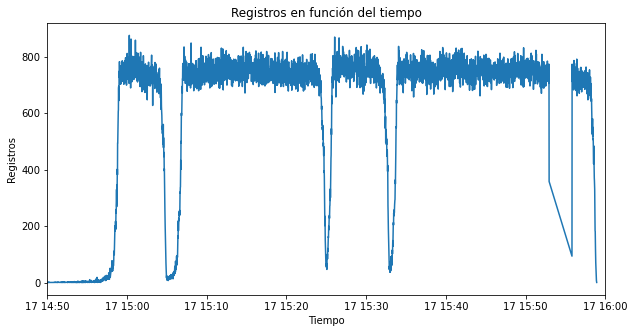

In [ ]:
from datetime import datetime
plt.figure(figsize=(10,5))
sns.lineplot(x = timeline_app.index, y = timeline_app['count'])
plt.gca().set(title='Registros en función del tiempo', ylabel='Registros', xlabel='Tiempo')
plt.xlim(datetime(2020,2,17,14,50), datetime(2020,2,17,16,0))

Como se aprecia, solo hay registros significativos desde las 14:55 hasta las 15:55 horas, esto ha sido entregado de esta forma por el operador de telecomunicaciones. Posteriormente, el operador entregara mas datos para completar el estudio

### Cantidad de registros por comuna

Deseo agregar la cantidad de registros por comuna

In [ ]:
registros_grstgo.groupBy("NOM_COMUNA").count().sort(F.desc("count")).show()

+----------------+------+
|      NOM_COMUNA| count|
+----------------+------+
|        SANTIAGO|406649|
|      LAS CONDES|263019|
|     PROVIDENCIA|209278|
|           MAIPÚ|113089|
|     PUENTE ALTO|110819|
|    SAN BERNARDO| 94565|
|           ÑUÑOA| 92081|
|      LA FLORIDA| 83187|
|ESTACIÓN CENTRAL| 74905|
|       QUILICURA| 70805|
|       PEÑALOLÉN| 67556|
|        VITACURA| 62949|
|        RECOLETA| 56958|
|      HUECHURABA| 55972|
|    LO BARNECHEA| 50192|
|           RENCA| 49139|
|        PUDAHUEL| 47782|
|      SAN MIGUEL| 43268|
|   QUINTA NORMAL| 41628|
|        LA REINA| 39246|
+----------------+------+
only showing top 20 rows



Se procede a plotear estos datos en un grafico de torta

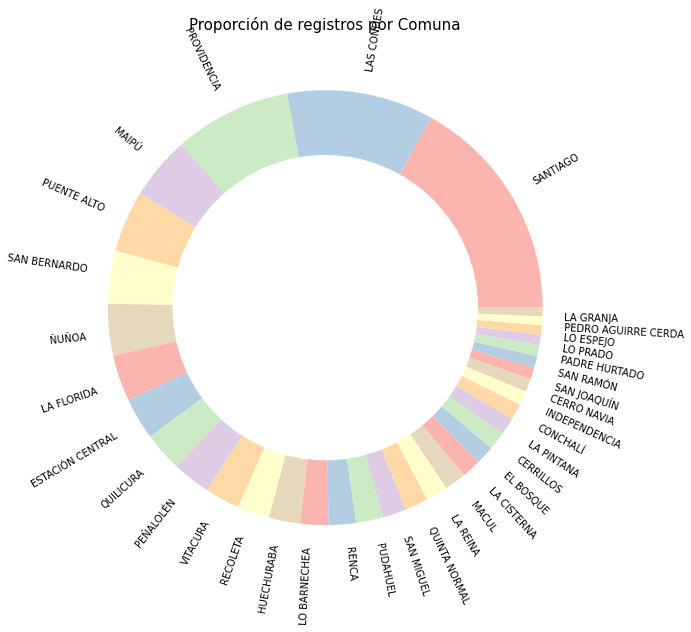

In [ ]:
reg_comuna = registros_grstgo.groupBy("NOM_COMUNA").count().sort(F.desc("count")).toPandas() #convierte en un dataframe pandas
reg_comuna.columns = ['NOM_COMUNA', 'count']
reg_comuna.head()

# Data
names=list(reg_comuna['NOM_COMUNA'])
size=list(reg_comuna['count'])

plt.figure(figsize=(10,10))
my_circle=plt.Circle((0,0), 0.7, color='white')

font = {'family' : 'sans-serif',
        'weight' : 'regular',
        'size'   : 10}

plt.rc('font', **font)

from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(size, 
        labels=names, 
        rotatelabels=True,
        colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Proporción de registros por Comuna', size=15)
plt.show()

Graficare un histograma de frecuencias en escala logaritmica, de forma de identificar graficamente los outliers del sistema.

[Text(0.5, 1.0, 'Frequency Histogram = all'),
 Text(0, 0.5, 'log(Frequency)'),
 Text(0.5, 0, 'User Interactions')]

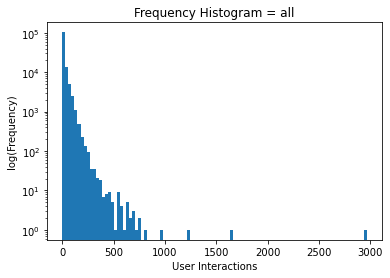

In [ ]:
usuarios = registros_grstgo.groupBy("USER_ID").count().sort(F.desc("count")).toPandas()
plt.hist(usuarios['count'], bins=100)
plt.yscale('log')
plt.gca().set(title='Frequency Histogram = all', ylabel='log(Frequency)', xlabel='User Interactions')

In [ ]:
a = len(usuarios.USER_ID[usuarios['count'] < 770])
b = len(usuarios.USER_ID[usuarios['count'] >= 770])
print('### Segregacion de usuarios por cantidad de registros ###')
print('Con menos de 350 registros = ', a)
print('Con mas de 350 registros = ', b)
print('La proporsion es = {}%'.format(round(b/a*100, 3)))

### Segregacion de usuarios por cantidad de registros ###
Con menos de 350 registros =  126687
Con mas de 350 registros =  5
La proporsion es = 0.004%


Tal como se ve en el grafico y los datos arriba, existen 5 usuarios realizan mas de 770 consultas. Estos usuarios no representan a la mayoria, por lo cual, se consideran outliers.

Se procedera a eliminarlos

In [ ]:
outliers= usuarios.USER_ID[usuarios['count'] >= 770].tolist()

In [ ]:
outliers

['a306279df498a6dd0a201ddfcd1ee11c36ff25347b076f06c55e48d912c8d637',
 '431562b734dae2f63d07f623d2e0b7b853e57af7c98138433aa39b360ea92aed',
 '672306dca44662f935fae1ffc5666d230354ed560efae91040b5802cb6cf3218',
 'a876237c1f3ca50a65a523ccbf9395f8ef04de387a2e4d189622dbe7034ebacb',
 '705ebaa8c777aa8898840d90e8e2ae9fea89c2517f141a873b3fde521d6fb404']

### Eliminando Outliers

In [ ]:
registros_grstgo = registros_grstgo.filter(~F.col('USER_ID').isin(outliers))

In [ ]:
registros_grstgo.show(5)

+-------+-------------------+--------------------+--------------+--------------+--------------+-----------+----------+
|CELL_ID|           EVENT_TM|             USER_ID|APP_SHORT_NAME|antenna_lat_co|antenna_lon_co| NOM_COMUNA|NOM_PROVIN|
+-------+-------------------+--------------------+--------------+--------------+--------------+-----------+----------+
|   1238|2020-02-17T15:01:16|d3c0e6101d975597e...|       Spotify|     -33.42109|     -70.75916|CERRO NAVIA|  SANTIAGO|
|   1238|2020-02-17T15:03:23|d3c0e6101d975597e...|       Spotify|     -33.42109|     -70.75916|CERRO NAVIA|  SANTIAGO|
|   1238|2020-02-17T15:01:50|d3c0e6101d975597e...|       Spotify|     -33.42109|     -70.75916|CERRO NAVIA|  SANTIAGO|
|   1238|2020-02-17T15:01:58|d3c0e6101d975597e...|     Instagram|     -33.42109|     -70.75916|CERRO NAVIA|  SANTIAGO|
|   1238|2020-02-17T15:02:07|d3c0e6101d975597e...|       Spotify|     -33.42109|     -70.75916|CERRO NAVIA|  SANTIAGO|
+-------+-------------------+-------------------

### Agrupar apps por comuna

Una vez eliminado los outliers, procedo a agrupar las apps por comuna del Gran Santiago.
Dado que en este punto es dificil utilizar spark para manipular el dataframe, se pasara a pandas dataframe utilizanod el metodo `.topandas` de spark, ademas en este punto ya no es necesario utilizar spark dado que el dataframe no tiene mas de 12000 filas. 

In [ ]:
comuna_apps = registros_grstgo.groupBy(["NOM_COMUNA","APP_SHORT_NAME"])
comuna_apps = comuna_apps.agg({'USER_ID':'count'}).toPandas()
comuna_apps = comuna_apps.groupby(['NOM_COMUNA','APP_SHORT_NAME']).sum()
g = comuna_apps['count(USER_ID)'].groupby(level=0, group_keys=False)
g = pd.DataFrame(g.nlargest(10))

El dataframe resultante tiene la siguiente forma

In [ ]:
g.head()

count(USER_ID)
NOM_COMUNA APP_SHORT_NAME                
CERRILLOS  Instagram                 7467
           Facebook                  5122
           Spotify                   2586
           GoogleSearch              2477
           Google                    2286

Donde se ha desagregado la data por comuna y por applicacion.

In [ ]:
g.loc['CERRILLOS']['count(USER_ID)']

APP_SHORT_NAME
Instagram       7467
Facebook        5122
Spotify         2586
GoogleSearch    2477
Google          2286
YouTube         1942
WazeGPS          760
Hangouts         528
ITunes           479
AppleiCloud      425
Name: count(USER_ID), dtype: int64

Con el medoto `.unstack` transformo el dataframe a uno donde las columnas son las aplicaciones y las filas son las comunas. 

In [ ]:
comuna_apps_u = g.unstack(level=1).fillna(0)

In [ ]:
#ORDENA LAS COLUMNAS
col = []
for i in comuna_apps_u.columns:
    col.append(i[1])
comuna_apps_u.columns = col

Se trabajara el dataframe para poder utilizarlo en la elaboracion del grafico de apps por comuna

In [ ]:
norm_antena = pd.DataFrame() #Crea un dataframe vacio

# llena el dataframe con los datos requeridos.
for com in cant_antenna_comuna.index.tolist():
    norm_antena = norm_antena.append(comuna_apps_u.loc[com]/cant_antenna_comuna.loc[com])
    
norm_antena = round(norm_antena,2) # redondea los datos a 2 digitos

#Elimina las aplicaciones mas utilizadas, ya que en todas las comunas forman parte del top, por lo cual no sirven para identificar patrones. 
norm_antena.drop(columns=['Instagram', 
                          'Facebook', 
                          'Spotify', 
                          'Google', 
                          'GoogleSearch', 
                          'YouTube'], inplace=True)

In [ ]:
top_app_pcom = pd.DataFrame() #crea un dataframe vacio

# llena el dataframe con las n-top apps.
for com in norm_antena.index.tolist():
    maximo = 0
    applicacion = ''
    for col in norm_antena.columns:
        if norm_antena.loc[com, col] > maximo:
            maximo = norm_antena.loc[com, col]
            applicacion = col
        else:
            next
    
    top_app_pcom = top_app_pcom.append({'NOM_COMUNA': com, 'APP_NAME': applicacion, 'VALOR': maximo}, ignore_index=True)

In [ ]:
#ORDENA LAS COLUMNAS PARA UNA MEJOR VISUALIZACION
top_app_pcom = top_app_pcom[['NOM_COMUNA', 'APP_NAME', 'VALOR']]

In [ ]:
top_app_pcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NOM_COMUNA  35 non-null     object 
 1   APP_NAME    35 non-null     object 
 2   VALOR       35 non-null     float64
dtypes: float64(1), object(2)
memory usage: 968.0+ bytes


### VISUALIZAR EN EL MAPA

Teniendo los datos preparados, se procede a elaborar el mapa con las apps  mas utilizadas. 

Se realizara un subset solo con las variables requeridas

In [ ]:
top_app_map = gransantiago[['NOM_COMUNA', 'SHAPE_Leng', 'SHAPE_Area', 'geometry']]

Se ordenan las variables por `NOM_COMUNA`

In [ ]:
top_app_map.sort_values('NOM_COMUNA', ascending=True, inplace=True)

/home/idiazg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


No es obligatorio, pero tengo como buena practica reconstruir el indice

In [ ]:
top_app_map.reset_index(inplace=True, drop=True)

In [ ]:
top_app_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NOM_COMUNA  36 non-null     object  
 1   SHAPE_Leng  36 non-null     float64 
 2   SHAPE_Area  36 non-null     float64 
 3   geometry    36 non-null     geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 1.2+ KB


Procedo a hacer un `merge` de los dataframes `top_app_pcom` y `top_app_map`.

In [ ]:
joined = top_app_pcom.merge(top_app_map, on=['NOM_COMUNA'], how='left')

Transformo el dataframe resultante en un geopandas dataframe

In [ ]:
joined = gpd.GeoDataFrame(joined)

Lo siguiente es para construir el mapa que deseo mostrar. 

In [ ]:
from palettable.colorbrewer.qualitative import Set2_6

/home/idiazg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  import sys


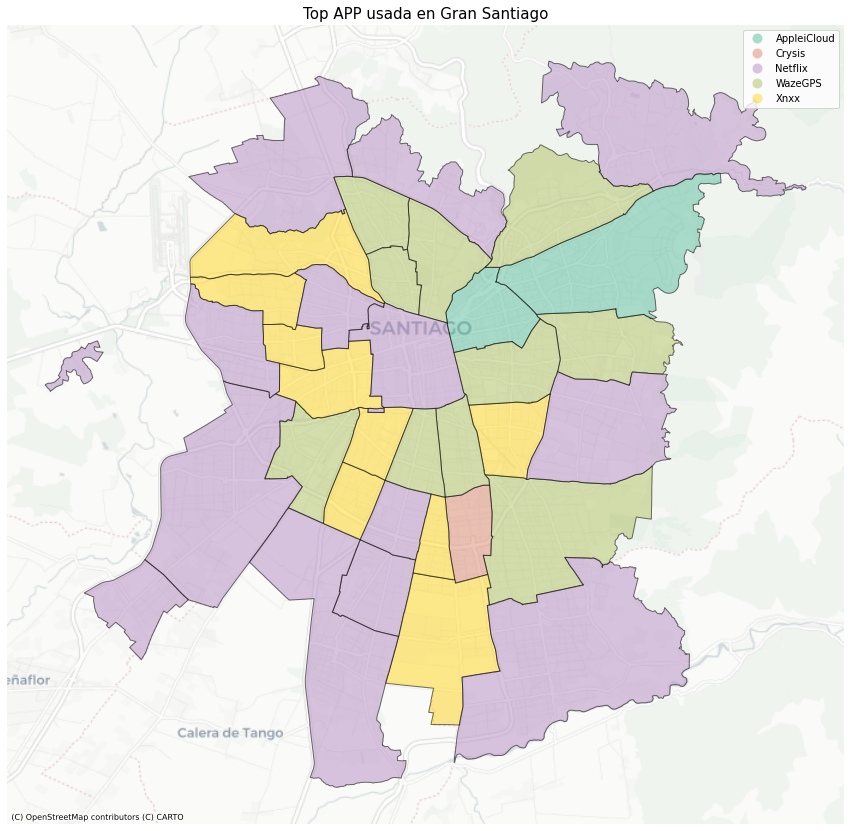

In [ ]:
ax=joined.to_crs(epsg=3857).plot(column='APP_NAME', 
                                 legend=True, 
                                 cmap = Set2_6.mpl_colormap,
                                 edgecolor="black",
                                 figsize=(15,15), 
                                 alpha=0.55)
ctx.add_basemap(ax, url=ctx.providers.CartoDB.Positron)
plt.title('Top APP usada en Gran Santiago', size=15)
ax.set_axis_off()

Tal como se ve en el mapa, las top-5 apps mas utilizada en las gran santiago son:

* iCloud (zona nor-oriente)
* Crysis (sur-oriente)
* Netflix (centro y comunas de la periferia)
* Waze (comunas del norte, sur y oriente, por donde pasa la autopista)
* Xnxx (sur y poniente)

Estos resultados corresponde a 1 hora aproximadamente de datos, se espera contar con mas datos para poder realizar un estudio mas completo de lo que sucede con la moviliddad y el uso de app, respecto del tiempo.

## BONUS

Graficando grandes cantidades de datos con Pydeck

Se carga el dataset previamente preparado

In [ ]:
df= pd.read_csv('data/data_joined.csv')

In [ ]:
df.head()

,antenna_lon_co,antenna_lat_co
0,-70.57131,-33.40691
1,-70.57131,-33.40691
2,-70.57131,-33.40691
3,-70.57131,-33.40691
4,-70.57131,-33.40691


Se carga el token en una variable de entorno

In [ ]:
os.environ["MAPBOX_API_KEY"] = 'pk.eyJ1IjoiZGlhemlkeCIsImEiOiJja2N0cnkxejExYXI0MzBtcWVjcTRkbmNoIn0.BjeLXQpXPoXTCxhLl84QPQ'

#### Si al finalizar el proceso se cuelga el notebook es por falta de memoria, sin embargo, podra ver el resultado en el archivo `demo.html`

In [ ]:
import pydeck as pdk
layer = pdk.Layer(
    'HexagonLayer',
    df,
    get_position=["antenna_lon_co", "antenna_lat_co"],
    auto_highlight=True,
    elevation_scale=50,
    pickable=False,
    radius = 200,
    elevation_range=[0, 2000],
    extruded=True,                 
    coverage=1)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=-70.650,
    latitude=-33.475,
    zoom=6,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html('demo.html')